# 지도학습

# 선형회귀(Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균
    (어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학적 기법)

$$
y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon
$$

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)

 - x : 어떤 조건(특성)

 - W : 각 조건의 영향력(가중치)
 
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

### 선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용

## 예시 문제 1

시험 성적 데이터



| X(학습 시간) | Y(시험 점수) |
| ------------ | ------------ |
| 9            | 90           |
| 8            | 80           |
| 4            | 40           |
| 2            | 20           |


- 7시간 공부 할 경우 성적은?

In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

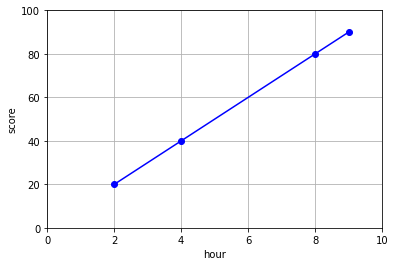

In [16]:
plt.plot(x, y, 'b-o')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('hour')
plt.ylabel('score')
plt.grid()
plt.show()

$$
y = ax + b
$$

a: 기울기

b: 절편

## 예시 문제 2

시험 성적 데이터



| X(학습 시간) | Y(시험 점수) |
| ------------ | ------------ |
| 8            | 97           |
| 6            | 91           |
| 4            | 93           |
| 2            | 81           |


- 7시간 공부 할 경우 성적은?

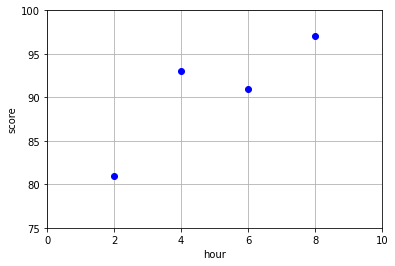

In [17]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

plt.plot(x, y, 'bo')
plt.xlim(0, 10)
plt.ylim(75, 100)
plt.xlabel('hour')
plt.ylabel('score')
plt.grid()
plt.show()

## 최소제곱법

$$
    a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }
$$

- 공부한 시간(x)의 평균

(2+4+6+8) / 4 = 5

- 성적(y)의 평균

(81+93+91+97) / 4 = 90.5

$$
b=y의 평균- (x의 평균 \times 기울기 a)
$$

- b = 90.5 - (2.3 * 5) = 79

In [5]:
# 기울기 a를 최소제곱으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    # 분자 부분
    dividend = 0
    for i in range(len(x)):
        dividend += (x[i] - mean_x)*(y[i] - mean_y)

    # 분모 부분
    divisor = sum([(x1 - mean_x)**2 for x1 in x])
    a = dividend / divisor

    return a

In [6]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, y, mx, my)
b = my - (mx * a)

print("a: ", a)     # 기울기
print("b: ", b)     # 절편

a:  2.3
b:  79.0


In [7]:
y1 = [a * x1 + b for x1 in x]

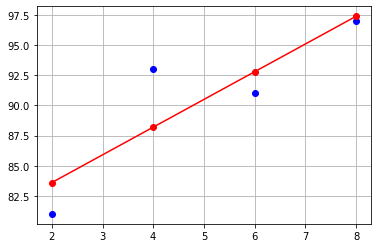

In [8]:
plt.plot(x, y, 'bo')
plt.plot(x, y1, 'r-o')
plt.grid()
plt.show()

# 선형회귀(Linear Regression)

또는 최소제곱법

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

$$
y=Wx+b
$$

- W : 가중치
- b : 편향(bias)

$$
H(x)=Wx+b
$$

- H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것

- 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

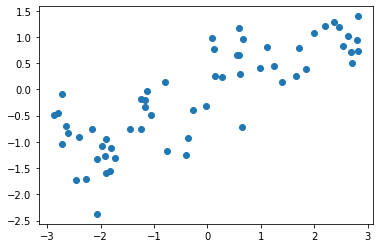

In [19]:
import numpy as np

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(60)
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


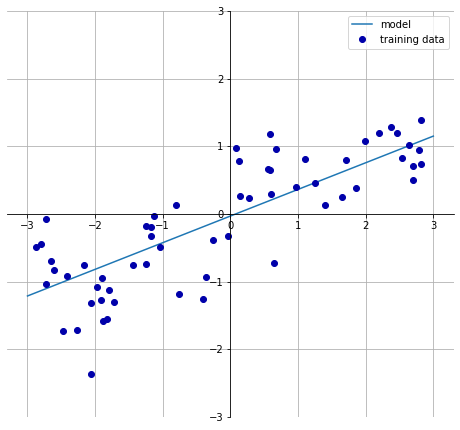

In [20]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

## 비용함수(Cost / Cost function)

그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

- Cost = H(x) - y 에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능

- Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression

- Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error) 을 사용

<br/>

$$
cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  
$$

<br/>

$$
H(x)=Wx+b
$$

<br/>

- 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

## 평균제곱오차(MSE) - 잘못 그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것

- 음수가 존재하는 경우 오차가 줄어드는 문제 --> 자승(제곱)을 취합

- 평균오차가 자승으로 인해 커지는 문제 --> 제곱근을 취함

| X(hour) | Y(score) |
| ------------ | ------------ |
| 0            | 0           |
| 1            | 1           |
| 2            | 2           |
| 3            | 3           |

$$
H(x)=1 \times x+0
$$

$$
H(x)=0.5 \times x+0
$$

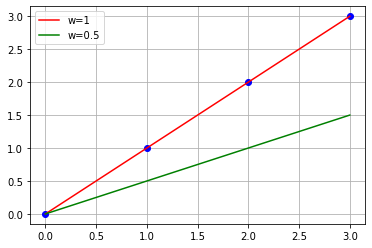

In [9]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치 및 편향 1
w = 1
b = 0

y_pred1 = w*x + b

plt.plot(x, y, 'bo')
plt.plot(x, y_pred1, 'r-', label='w=1')


# 가중치 및 편향 2
w = 0.5
b = 0

y_pred2 = w*x + b

plt.plot(x, y_pred2, 'g-', label='w=0.5')

plt.legend()
plt.grid()
plt.show()

## 평균제곱오차(MSE) 연습문제

$$
\cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? 
$$

In [10]:
def mse(y_pred, y):
    cost = np.sum((y - y_pred)**2) / len(y)

    return cost

In [11]:
cost = mse(y_pred1, y)
print(cost)

cost = mse(y_pred2, y)
print(cost)

0.0
0.875


## 경사하강법(Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동하여 값을 최적화 시키는 방법(오차(기울기)가 가장 작은 방향으로 이동시키는 방법)